<a href="https://colab.research.google.com/github/edgarbc/my_autosleep_analysis/blob/main/my_autosleep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# get data from my google drive
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [ ]:
!ls

drive  sample_data


In [ ]:
datadir = '/content/drive/My Drive/Colab Notebooks/autosleep_data/'
fname = 'AutoSleep-20201118-to-20201215.csv'
print([datadir + fname])
df_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/autosleep_data/AutoSleep-20201118-to-20201215.csv') 


['/content/drive/My Drive/Colab Notebooks/autosleep_data/AutoSleep-20201118-to-20201215.csv']


In [ ]:
df_data.head()


,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,sessions,asleep,asleepAvg7,efficiency,efficiencyAvg7,quality,qualityAvg7,deep,deepAvg7,sleepBPM,sleepBPMAvg7,dayBPM,dayBPMAvg7,wakingBPM,wakingBPMAvg7,hrv,hrvAvg7,SpO2Avg,SpO2Min,SpO2Max,tags,notes
0,2020-11-18T20:59:59-07:00,"Tuesday, Nov 17, 2020","Wednesday, Nov 18, 2020",2020-11-17 21:15:00,2020-11-18 07:17:00,10:02:00,01:47:00,00:00:00,1,08:15:00,08:04:40,82.2,79.0,06:54:51,06:16:33,03:30:00,02:18:50,60.9,60.6,74.9,72.9,58.6,62.9,88,60,NaN,NaN,NaN,NaN,NaN
1,2020-11-19T20:59:59-07:00,"Wednesday, Nov 18, 2020","Thursday, Nov 19, 2020",2020-11-18 22:45:00,2020-11-19 06:32:00,08:26:00,00:56:00,00:00:00,2,07:30:00,07:59:42,88.0,80.3,05:14:26,06:07:40,00:45:40,02:05:31,72.8,62.4,73.0,74.0,65.0,63.2,37,56,NaN,NaN,NaN,NaN,NaN
2,2020-11-20T20:59:59-07:00,"Thursday, Nov 19, 2020","Friday, Nov 20, 2020",2020-11-19 22:00:00,2020-11-20 07:00:00,09:00:00,01:23:00,00:00:00,1,07:37:00,07:50:17,84.6,80.6,05:48:43,06:01:56,01:00:56,01:58:51,55.9,62.1,68.8,72.2,57.0,63.4,36,47,NaN,NaN,NaN,NaN,NaN
3,2020-11-21T20:59:59-07:00,"Friday, Nov 20, 2020","Saturday, Nov 21, 2020",2020-11-20 22:01:00,2020-11-21 06:54:00,08:53:00,00:04:00,00:00:00,1,08:49:00,08:01:25,99.2,83.6,07:01:20,06:12:09,02:04:28,01:53:00,58.2,61.5,71.9,71.8,57.0,63.4,61,50,NaN,NaN,NaN,NaN,NaN
4,2020-11-22T20:59:59-07:00,"Saturday, Nov 21, 2020","Sunday, Nov 22, 2020",2020-11-21 21:37:00,2020-11-22 07:59:00,10:22:00,01:14:00,00:00:00,1,09:08:00,08:04:08,88.1,84.7,07:20:55,06:18:15,03:39:12,02:06:32,57.6,61.4,66.9,72.1,56.0,63.2,37,51,NaN,NaN,NaN,NaN,NaN


0       Tuesday, Nov 17, 2020
1     Wednesday, Nov 18, 2020
2      Thursday, Nov 19, 2020
3        Friday, Nov 20, 2020
4      Saturday, Nov 21, 2020
5        Sunday, Nov 22, 2020
6        Monday, Nov 23, 2020
7       Tuesday, Nov 24, 2020
8     Wednesday, Nov 25, 2020
9      Thursday, Nov 26, 2020
10       Friday, Nov 27, 2020
11     Saturday, Nov 28, 2020
12       Monday, Nov 30, 2020
13       Tuesday, Dec 1, 2020
14     Wednesday, Dec 2, 2020
15      Thursday, Dec 3, 2020
16        Friday, Dec 4, 2020
17      Saturday, Dec 5, 2020
18        Sunday, Dec 6, 2020
19        Monday, Dec 7, 2020
20       Tuesday, Dec 8, 2020
21     Thursday, Dec 10, 2020
22       Friday, Dec 11, 2020
23       Sunday, Dec 13, 2020
24       Monday, Dec 14, 2020
Name: fromDate, dtype: object


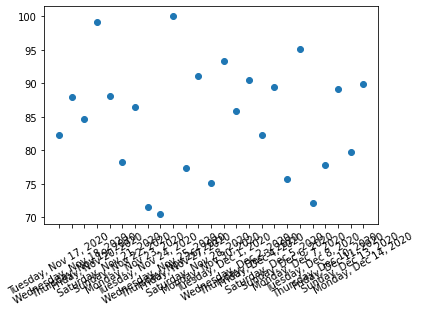

In [ ]:
print(df_data['fromDate'])
fig, ax = plt.subplots()
plt.plot_date(df_data['fromDate'],df_data['efficiency'])
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()


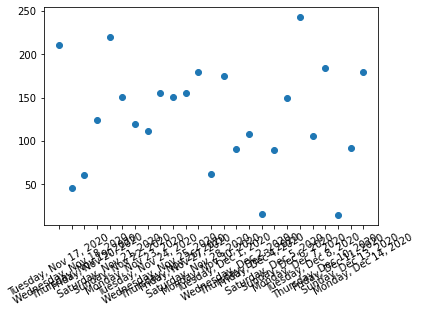

In [ ]:
# plot the amount of deep sleep across days

num_days = df_data['deep'].size

df_deep = pd.DataFrame()
for d in range(num_days):
  df_deep = df_deep.append({'mins':get_mins(df_data['deep'][d])}, ignore_index='True')
 
# plot the deep sleep 
fig, ax = plt.subplots()
plt.plot_date(df_data['fromDate'],df_deep['mins'])
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()



In [ ]:
def get_mins(time_str):
  h, m, s = time_str.split(':')
  return (int(h) * 3600 + int(m) * 60 + int(s))/60.0

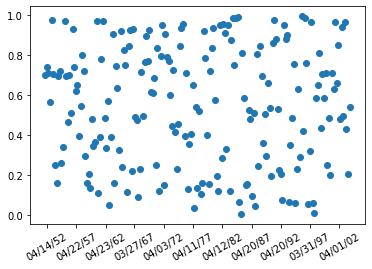

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

# Fixing random state for reproducibility
np.random.seed(19680801)


# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()